## MLP sin bibliotecas

Referencia 

 - data science with david selby: [Building a neural network from scratch in R](https://selbydavid.com/2018/01/09/neural-network/) (9 January 2018)
 
Aquí usa la aproximación backprop con función de pérdidas "log-likelihood for a binary classifier" (*fit the model using maximum likelihood = train the multilayer perceptron by minimising the cross entropy loss*)

## Dataset

In [1]:
circle <- read.csv('data/circle.csv', header = F)
colnames(circle) <- c('x1', 'x2', 'class')
circle$class <-  as.factor(circle$class)
levels(circle$class) <- c('outside', 'inside')
str(circle)

'data.frame':	100 obs. of  3 variables:
 $ x1   : num  -0.9719 -0.553 -0.0949 -0.8096 0.399 ...
 $ x2   : num  0.847 -0.577 -0.299 0.857 0.69 ...
 $ class: Factor w/ 2 levels "outside","inside": 1 1 2 1 1 1 1 1 1 1 ...


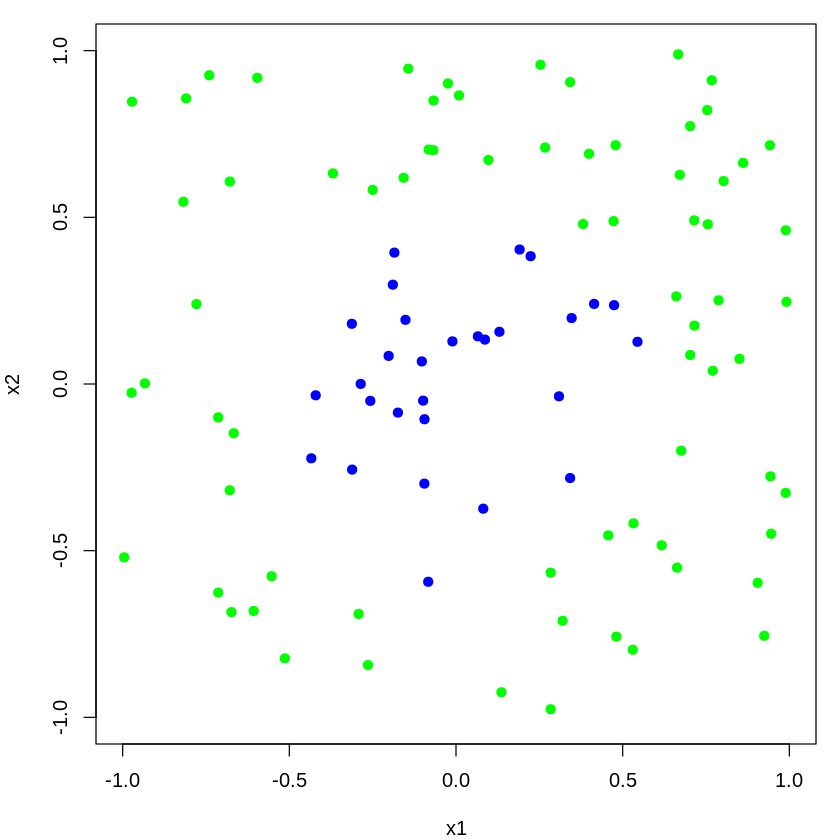

In [2]:
ind_out <- which(circle[,'class']== 'outside')
ind_in <- which(circle[,'class']== 'inside')
par(mar = c(4,4,1,1))
plot(circle[ind_out,'x1'],circle[ind_out,'x2'],
     type='p',
     xlim=c(-1,1),ylim=c(-1,1), 
     xlab = 'x1', ylab = 'x2',
     col = 'green', pch = 19)
points(circle[ind_in,'x1'],circle[ind_in,'x2'],
      col='blue', pch = 19)

## Implementación

In [3]:
feedforward <- function(x, w1, w2) {
  z1 <- cbind(1, x) %*% w1
  h <- sigmoid(z1)
  z2 <- cbind(1, h) %*% w2
  list(output = sigmoid(z2), h = h)
}

In [4]:
sigmoid <- function(x) 1 / (1 + exp(-x))

In [5]:
backpropagate <- function(x, y, y_hat, w1, w2, h, learn_rate) {
  dw2 <- t(cbind(1, h)) %*% (y_hat - y)
  dh  <- (y_hat - y) %*% t(w2[-1, , drop = FALSE])
  dw1 <- t(cbind(1, x)) %*% (h * (1 - h) * dh)
  
  w1 <- w1 - learn_rate * dw1
  w2 <- w2 - learn_rate * dw2
  
  list(w1 = w1, w2 = w2)
}

In [6]:
train <- function(x, y, hidden = 5, learn_rate = 1e-2, iterations = 1e4) {
  d <- ncol(x) + 1
  w1 <- matrix(rnorm(d * hidden), d, hidden)
  w2 <- as.matrix(rnorm(hidden + 1))
  for (i in 1:iterations) {
    ff <- feedforward(x, w1, w2)
    bp <- backpropagate(x, y,
                        y_hat = ff$output,
                        w1, w2,
                        h = ff$h,
                        learn_rate = learn_rate)
    w1 <- bp$w1; w2 <- bp$w2
  }
  list(output = ff$output, w1 = w1, w2 = w2)
}

## Entrenamiento

In [7]:
x <- data.matrix(circle[, c('x1', 'x2')])
y <- circle$class == 'inside'
nnet5 <- train(x, y, hidden = 5, iterations = 1e5)

In [8]:
length(y)

[1] 100

In [9]:
as.integer(y)

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 [38] 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 [75] 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0

In [10]:
length(nnet5$output)

[1] 100

In [11]:
as.integer(nnet5$output > .5)

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 [38] 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 [75] 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0

In [12]:
mean(as.integer(nnet5$output > .5) == y)

[1] 1

In [13]:
dim(nnet5$w1)
dim(nnet5$w2)

[1] 3 5

[1] 6 1

In [14]:
print(nnet5$w1)

        [,1]       [,2]       [,3]      [,4]       [,5]
   -8.032761  3.9704589   8.986527  8.370441  -5.090541
x1  2.952146 -0.4563986 -17.658683 15.556675   1.282974
x2 17.260932  0.4672290   7.345590  5.441427 -10.084687


In [15]:
print(nnet5$w2)

          [,1]
[1,] -17.12088
[2,] -26.14978
[3,] -13.13264
[4,]  22.34062
[5,]  22.40978
[6,] -12.17141


In [16]:
head(nnet5$output)

3.515144e-14
2.130388e-06
9.999985e-01
2.069738e-09
1.241062e-05
7.753947e-08


## Visualización

In [17]:
library('ggplot2')

In [18]:
grid <- expand.grid(x1 = seq(min(circle$x1) - .5,
                             max(circle$x1) + .5,
                             by = .0625),
                    x2 = seq(min(circle$x2) - .5,
                             max(circle$x2) + .5,
                             by = .0625))

In [19]:
ff_grid <- feedforward(x = data.matrix(grid[, c('x1', 'x2')]),
                       w1 = nnet5$w1,
                       w2 = nnet5$w2)
grid$class <- factor((ff_grid$output > .5) * 1,
                     labels = levels(circle$class))

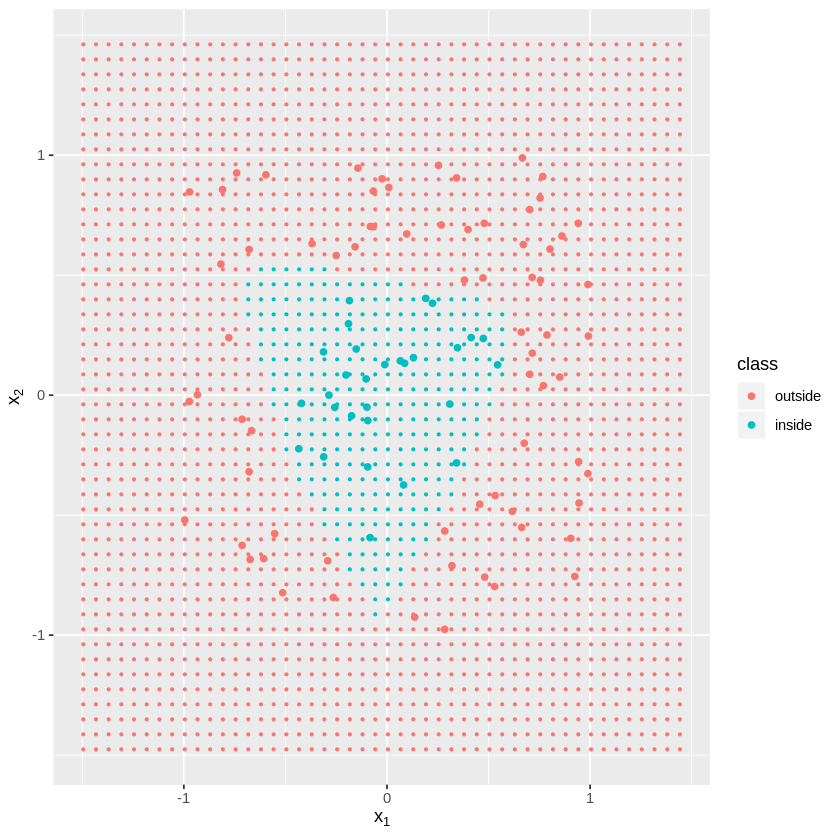

In [20]:
ggplot(circle) + aes(x1, x2, colour = class) +
  geom_point(data = grid, size = .5) +
  geom_point() +
  labs(x = expression(x[1]), y = expression(x[2]))